# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [105]:
import pandas as pd
from scipy import stats

df = pd.read_csv('human_temp/human_temp/data/human_body_temperature.csv')

In [106]:
# Your work here.
# getting a feel of the dataset and examining the data
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


### Q1) Is the distribution of body temperatures normal? 

Normal distributions are characterized as being symmetrical, unimodal/bell-shaped, with roughly 68% of the observations falling within 1 standard deviation of the mean AND roughly 95% falling within 1.96 standard deviations of the mean.  

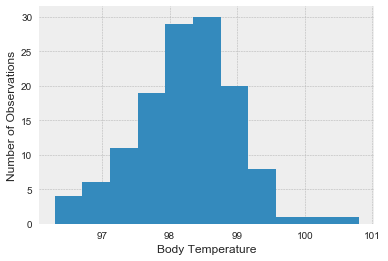

In [107]:
#plotting the sample data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
%matplotlib inline
plt.style.use('bmh')

import numpy as np

#declaring bin size. bin size is defined here by using the square-root rule (taking square root of the # of samples)
n_bins = int(np.sqrt(len(df['temperature'])))

_ = plt.hist(df['temperature'], bins=n_bins) 
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Number of Observations')
plt.show()

Distribution of body temperatures appear to be roughly symmetrical and bell-shaped. 

Now, let's check the normality (if any) from the data set.  This data will also be used for later inference...

In [108]:
#defining Empirical Cumulative Distribution Function to plot sample cumulative distribution vs. the theoretical normal

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [109]:
#obtaining mean and standard dev. from sample data to model and plot a theoretical normal distribution

mean_temp = np.mean(df['temperature'])
std_temp = np.std(df['temperature'])
temp_samples = np.random.normal(mean_temp, std_temp, size=10000)

x_temp, y_temp = ecdf(df['temperature'])
x_theor, y_theor = ecdf(temp_samples)

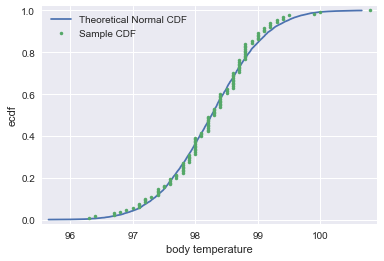

In [110]:
import seaborn as sns
sns.set()


_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('ecdf')
_ = plt.legend(['Theoretical Normal CDF', 'Sample CDF'])
plt.margins(0.02)
plt.show()


In the above plot, the blue solid line represents the empirical cumulative distribution of body temperatures given the sample mean and sample standard deviation and modeled as a normal distribution.  

The green dots represent the ECDF of body temperatures from the sample data.  We also see that the ECDF of the sample data is very closely aligned with the ECDF of a presumed normal distribution (using the sample mean and standard deviation). 

For the sake of thoroughness, let us also check to see if the sample set confirms to the 68% and 95% rule. The resulting values can be cross-referenced with the above plot. In fact, we do see at lest 68% of the observations are below 98.98 degrees and that at least 95% of the observations are roughly below 99.68 degrees.  

In [111]:
print('We expect to find roughly 68% of the observations below a body temperature value of: ', 
      mean_temp + std_temp)
print('We expect to find roughly 95% of the observations below a body temperature value of: ', 
      mean_temp + (1.96*std_temp))

print(np.percentile(df['temperature'], [68,95]))

print('The sample mean is: ', mean_temp)
print('The sample standard deviation is: ', std_temp)

We expect to find roughly 68% of the observations below a body temperature value of:  98.97958854813581
We expect to find roughly 95% of the observations below a body temperature value of:  99.68073201588466
[ 98.6  99.3]
The sample mean is:  98.24923076923078
The sample standard deviation is:  0.7303577789050377


**Conclusion 1:** The sample data is normally distributed as a) the distribution of the observations is roughly symmetrical and bimodal, b) the CDF of the sample data is closely aligned with a CDF of a sample set that is modeled as a normal distribution and c) the sample set conforms to the characteristic that 68% of observations are within 1 standard deviation and that 95% of observations are within 1.96 standard deviations.


### Q2) Is the sample size large? Are the observations independent? 

A sample size (n) greater than 30 is considered large.  We will examing the data set if the sample size is greater or less than 30.  We will also examine the data to determine if they are independent (that is, each observation/row is unique).

In [112]:
print('The temperature column contains ', len(df['temperature']), 'observations.')
df.head()

The temperature column contains  130 observations.


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**Conclusion 2:** The dataset contains 130 data points and thus we can consider the sample size to be large.  Secondly, we are unable to assume the observations are independent as it is not evident whether these observations are unique people (and thus independent) or just periodic sampling of one male and one female subject.  Furthermore, one can infer that heart rate can be a factor which affects body temperature.  

### Question 3) Is the true population mean really 98.6 degrees F?

    *Would you use a one-sample or two-sample test? Why?
    *In this situation, is it appropriate to use the t or z statistic?
    *Now try using the other test. How is the result be different? Why? 


### Conclusion 3: 

To investigate this question, we will need to frame our hypothesis for testing.  For this test, we will use a one-sample test since we are only given one sample data set.  I have determined the hypothesis (with a confidence level of 95% as follows:

    *(Null Hypothesis) Ho: True mean population temperature = 98.6 F 
    **...or, Ho: μ1 = μ2
    *(Alternative Hypothesis) Ha: True mean population temperature ≠ 98.6 F 
    **...or, H1: μ1 ≠ μ2

For this situation, we will be computing a t-test since we are comparing our sample mean (98.25) against a proposed population mean (98.6).  For the test, we will reject the null hypothesis if the test statistic is greater than 1.96 standard deviations or outside of a 95% confidence level).

In [113]:
mu = 98.6

tstat, t_pval = stats.ttest_1samp(a=df['temperature'], popmean=mu)
print('The T-Statistic is %d with a p-value of %s' %(abs(tstat),t_pval))

The T-Statistic is 5 with a p-value of 2.41063204156e-07


Our test returns a t-statistic of 5.45. This means that we would observe a mean of 98.6 at 5.45 standard deviations from our sample mean.  


Furthermore, our P-value can be considered very small and suggests a very low probability of observing a body temperature of 98.6 or greater. 


As we increase our sample size, our t-test will converge to yield a similar result as a z-test. 


In the below test, we arrive to the same conclusion as the z-stat suggests that a population mean of 98.6 would be observed more than 5 standard deviations from a population mean as determined by our sample.  We find that our P-value in this test is even smaller than our t-test and suggests an even smaller probability that we would observe a population mean greater than 98.6


In [114]:
from statsmodels.stats.weightstats import ztest
z_score, z_pval = ztest(df['temperature'],value=98.6)
print('The Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))

The Z-Statistic is 5 with a p-value of 4.9021570141e-08


### Q4) Draw a small sample of size 10 from the data and repeat both tests.

    *Which one is the correct one to use?
    *What do you notice? What does this tell you about the difference in application of the tt and zz statistic?
    
The z-test would be more appropriate as we are now comparing the means from two different samples. 

In [115]:
#getting a random sample of 10 observations
np.random.seed(7)
rand_samp = np.random.choice(df['temperature'], size=10)

#t-test, the more appropriate test with a sample size >30
rs_ttest,rs_t_pval = stats.ttest_1samp(a=rand_samp, popmean=mu)

#repeating with z-test
rs_zscore, rs_z_pval = ztest(rand_samp,value=98.6)

#results
print('Given the new sample, the T-Statistic is %d with a p-value of %s' %(abs(rs_ttest),rs_t_pval))
print('Given the new sample, the Z-Statistic is %d with a p-value of %s' %(abs(rs_zscore), rs_z_pval))

Given the new sample, the T-Statistic is 1 with a p-value of 0.30930267922
Given the new sample, the Z-Statistic is 1 with a p-value of 0.281271432868


### Conclusion 4)

The correct test to use in the case of random sample of size=10 is a t-test.  We notice that the statistic is 1 standard deviation in both tests.  If we assume a confidence level of 95% or 1.96 standard deviations, then we fail to reject the null hypothesis in both tests.

However, our results are not stastically significant as our P-value is very high at ~0.30.  This suggests that we can anticipate a high probability that we will observe test statistics greater than our results.  In other words, a ~30% change we can observe a higher test statistic which can lead us to a different hypothesis acceptance.  

### Q5)At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 

In [116]:
n=len(df['temperature'])

#standard error
std_error = std_temp / np.sqrt(n)
print('The standard error/margin of error is %s' %std_error)

#compute confidence interval at the 95% level
conf_int = stats.t.interval(alpha = .95, df = n-1, loc = mean_temp,
                 scale=stats.sem(df['temperature']))
print('At the 95% level, the lower bound of our confidence interval is ',conf_int[0], 
      ' and the upper bound is ',conf_int[1]) 


The standard error/margin of error is 0.0640566146952
At the 95% level, the lower bound of our confidence interval is  98.1220029056  and the upper bound is  98.3764586329


### Conclusion 4: 
Given our confidence interval, we would consider someone's body temperature lower than 98.12 or higher than 98.37 to be considered abnormal. That is, we expect only 5% of the population to have a body temp <98.12 or >98.37.

### Q6) Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [117]:
#we can again use a t-test as we are comparing the means from two samples
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']

print('Mean body temp of male samples: ', np.mean(male_temps))
print('Mean body temp of female samples: ', np.mean(female_temps))

gender_ttest, gender_pval = stats.ttest_ind(a=male_temps, b=female_temps, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(gender_ttest), gender_pval))

Mean body temp of male samples:  98.1046153846154
Mean body temp of female samples:  98.39384615384613
The T-Statistic is 2 with a p-value of 0.0239382641829


### Conclusion 6:
At the 95% confidence level, our hypothesis test would be:

*(Null Hypothesis) Ho: Normal Male temperature = Normal Female Temperature

*(Alternative Hypothesis) Ha: Normal Male temperature ≠ Normal Female Temperature

We would reject the null hypothesis if our test statistic value was > 1.96 standard deviations (95% confidence level)

In this case, we would reject the null hypothesis in favor of the alternative which suggests a statistically significant difference between males and females (further evidenced by a relatively small p-value).  Because of this finding, it may be warranted to revisit the original question in the context of gender.  If males and females body temps seem to differ substantially, we may come to different conclusions if we compared our samples by gender and our population mean (by gender). 